In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis
In this section we are going to perform exploratory data analysis on our dataset.
**Key Tasks:**
1. Reading the Dataset
2. Descriptive Statistics of numerical features.
3. Handling Missing values
4. Detecting outliers
5. Distribution of target variable -- SalePrice
6. Correlation Analysis


##Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest

##Read the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/Projects/Housing Price Prediction/Data/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##Descriptive stats

In [5]:
#shape of the data
df.shape

(1460, 81)

**Our data contains 1460 rows, i.e. houses, and 81 columns i.e. features of the house.**


In [6]:
#data types of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#descriptive stats of numerical coulmns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**As we have 38 columns here, that means , in dataset we have 38 numerical features and rest are categorical.**
**Through descriptive stats we can understand the central tendencies and skeweness of numerical features, this provides a concise overview of numerical features.**

#Handling missing values
Handling missing values is crucial step for in data analysis as they can lead to biased result, which will further lead to inaccurate predictions.

In [8]:
#getting columns containing missing values
nan_cols =  list(df.isnull().sum().index[df.isnull().sum().values != 0])
total_nan_cols = len(nan_cols)
print('Total features contaning missing values: ', total_nan_cols)

Total features contaning missing values:  19


In [9]:
#separating numerical and categorical columns

#fn to fetch col type
def get_col_type(col):
    return 'numerical' if col.dtype in [np.float64, np.int64] else 'categorical'

#create list for numerical and categorical features
num_nan_cols = []
cat_nan_cols = []

#iterate through every coln in that contains missing values and then append it to numerical or categorical coln list.
for col in nan_cols:
  dtype = get_col_type(df[col])
  if dtype=='numerical':
    num_nan_cols.append(col)
  else:
    cat_nan_cols.append(col)

print('Categorical Nan value columns: ', cat_nan_cols)
print('Numerical  Nan value columns: ', num_nan_cols)

Categorical Nan value columns:  ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Numerical  Nan value columns:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


###Handling missing values  in categorical columns

To fill in missing values in categorical variables, it is important to understand their distribution. One way to visualize the distribution is by using bar charts. Therefore, it is recommended to plot bar charts for all categorical columns with missing values.

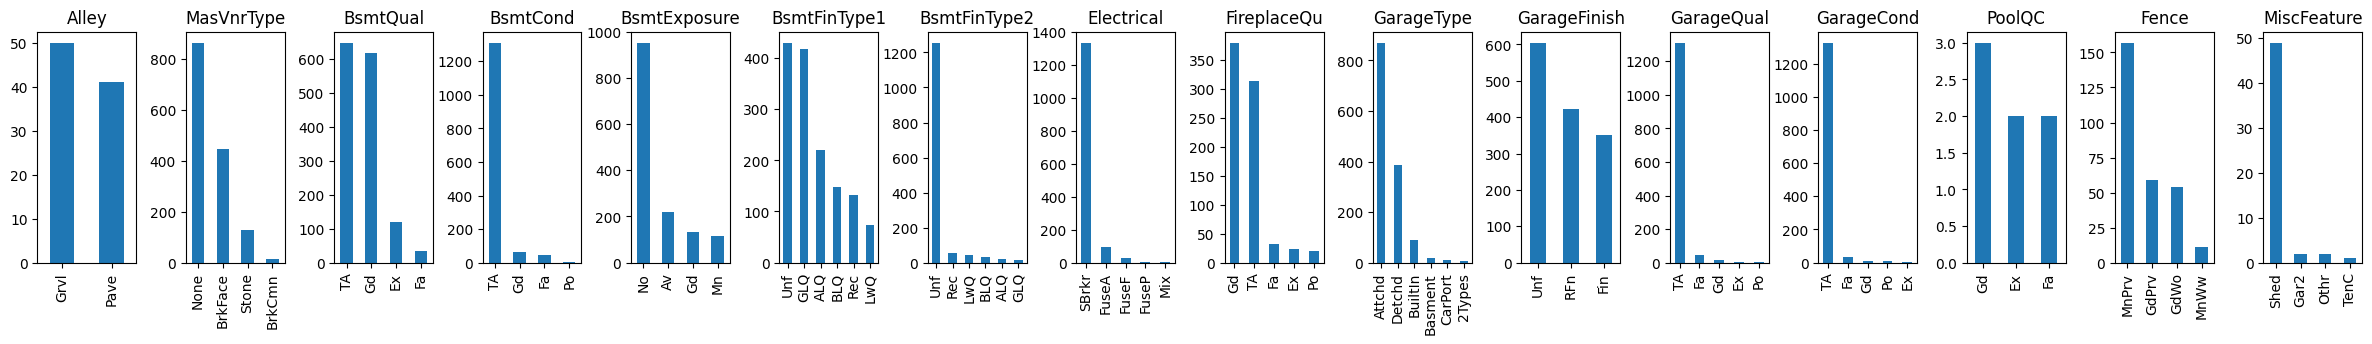

In [11]:
# plt.figure(figsize=(3,2))
# create subplots with multiple columns
fig, axs = plt.subplots(nrows=1, ncols=len(cat_nan_cols), figsize=(30,3))
for i, col in enumerate(cat_nan_cols):
    df[col].value_counts().plot.bar(ax=axs[i])
    axs[i].set_title(col)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

From above graphs we can clearly see that for columns : **'BsmtCond', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'BsmtQual' , 'BsmtExposure', 'MasVnrType'**  have highly skewed distribution , so we can safely fill their missing values with mode.
But in **'BsmtCond', 'BsmtFinType2','GarageType', 'GarageQual', 'GarageCond'  , BsmtQual' , 'BsmtExposure', 'MasVnrType'** , None value actually means there is absense of that particular feature , so we will create new category for nan values.
As categories in columns such as **'Alley', 'BsmtFinType1', 'GarageFinish', 'PoolQC'** have a significant proportion compared to other categories, it is recommended to create a new category as "unknown" for missing values in those columns.


**Filling missing values with mode**

In [12]:
#fetch columns in which we have to fill nan values with mode

mode_cols = ['Electrical',  'FireplaceQu', 'Fence', 'MiscFeature']

#filling missing values with mode.
for col in mode_cols:
   df[col].fillna(df[col].mode()[0], inplace = True)

#Verify whether these columns still have any missing values.

print(df[mode_cols].isna().sum())

Electrical     0
FireplaceQu    0
Fence          0
MiscFeature    0
dtype: int64


Now that we have filled the missing values for the columns with skewed distribution, we can create a new category named "Unknown" for the remaining categorical columns to handle their missing values.

In [13]:
#fetching remaining columns
cat_nan_cols = set(cat_nan_cols) - set(mode_cols)
print(cat_nan_cols)

#replace nan values with 'Unknown'
for col in cat_nan_cols:
  df[col].fillna('Unknown', inplace=True)

#Verify whether these columns still have any missing values.
df[list(cat_nan_cols)].isna().sum()

{'BsmtCond', 'BsmtExposure', 'GarageFinish', 'Alley', 'BsmtFinType1', 'GarageQual', 'BsmtQual', 'GarageCond', 'BsmtFinType2', 'MasVnrType', 'PoolQC', 'GarageType'}


BsmtCond        0
BsmtExposure    0
GarageFinish    0
Alley           0
BsmtFinType1    0
GarageQual      0
BsmtQual        0
GarageCond      0
BsmtFinType2    0
MasVnrType      0
PoolQC          0
GarageType      0
dtype: int64

Now that all the missing values in the categorical columns have been filled, let's move on to the numerical columns.

###Handling missing values  in numerical  columns

In [14]:
#obtain a list of numerical columns containing missing values
num_nan_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In order to fill the missing values in numerical columns, we need to check the distribution of the data. If the distribution is normal, we can use mean or median to fill in the missing values. However, if the distribution is skewed, we might need to use mode or other methods to fill in the missing values.

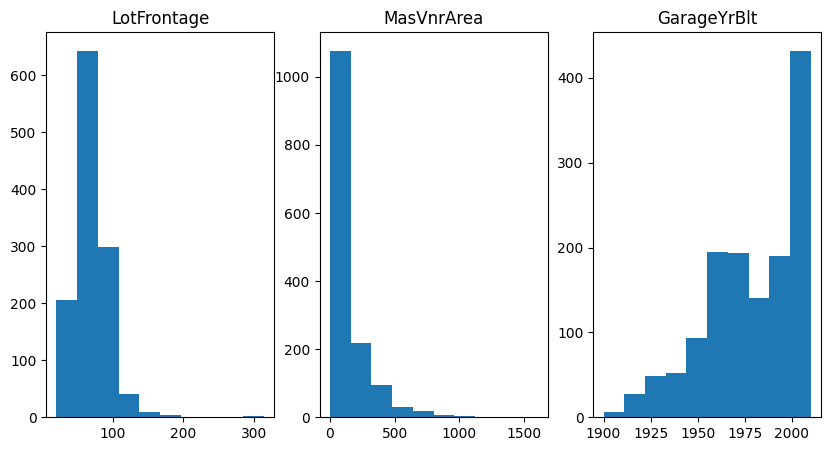

In [15]:
#plot all the numerical colns
fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].hist(df[num_nan_cols[0]])
ax[0].set_title(num_nan_cols[0])

ax[1].hist(df[num_nan_cols[1]])
ax[1].set_title(num_nan_cols[1])

ax[2].hist(df[num_nan_cols[2]])
ax[2].set_title(num_nan_cols[2])
plt.show()

As we can see 'LotFrontage' and  'MasVnrArea' has right tailed distribution ,
and 'GrgYrBlt' has left tailed distribution. In such cases the best approach is to fill in the missing values with the median instead of the mean. The median is less sensitive to outliers, which is a common occurrence in skewed distributions.

In [16]:
#fill missing values with median

for col in num_nan_cols:
  df[col].fillna(df[col].median(), inplace=True)

#Verify whether these columns still have any missing values.
df[num_nan_cols].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [17]:
#check if dataset has any missing values in it
df.columns[df.isnull().any()]

Index([], dtype='object')

 **Now that none of the column has missing values, we can proceed with further exploratory data analysis.**

#Detection of  Outliers

In [18]:
#functions to fetch numerical features  who have outliers
def find_outliers(df, columns):
    outliers = []
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        count_upper = len(df[df[col] > upper])
        count_lower = len(df[df[col] < lower])
        total_outliers = count_upper + count_lower
        #only those columns who have more than 50 outliers
        if total_outliers > 50:
            outliers.append(col)
    return outliers


In [19]:
# select only numerical columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

#fetch columns having outliers in them
outlier_cols = find_outliers(df, num_cols)
print(outlier_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtHalfBath', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


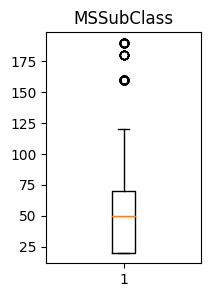

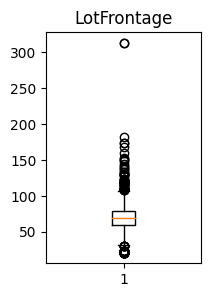

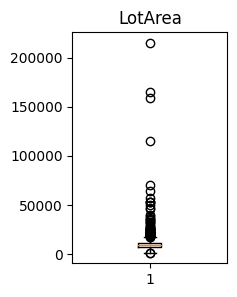

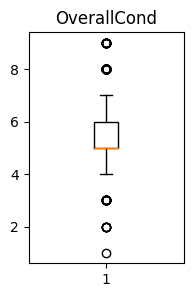

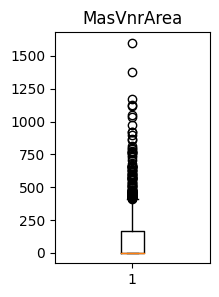

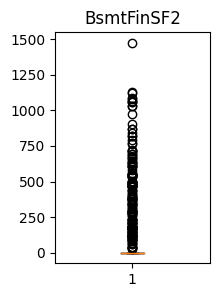

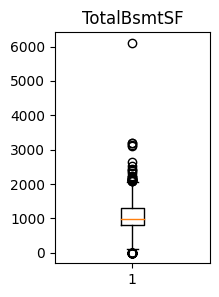

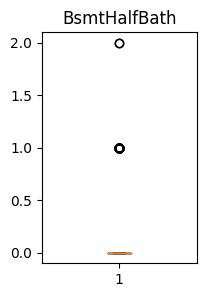

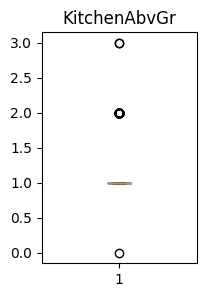

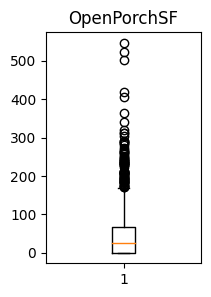

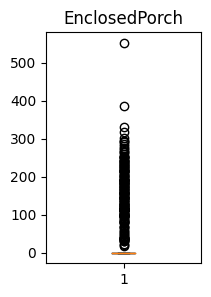

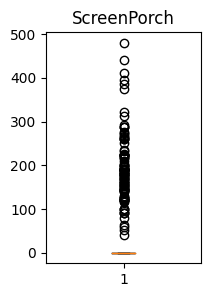

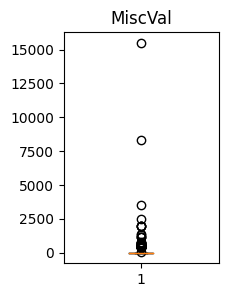

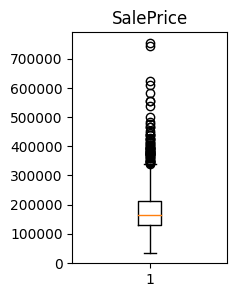

In [20]:
# splot the columns
for col in outlier_cols:
  plt.figure(figsize=(2,3))
  plt.boxplot(df[col])
  plt.title(col)
  plt.show()

##Distribution of SalePrice

In [21]:
#descriptive stats
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

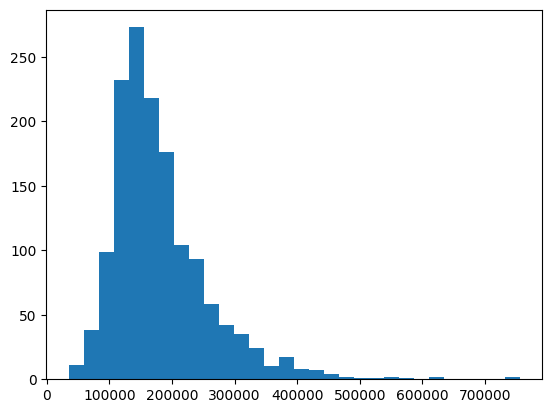

In [22]:
plt.hist(df['SalePrice'], bins=30)
plt.show()

In [23]:
#check if SalePrice follows normal distribution
stat, p = normaltest(df['SalePrice'])
alpha = 0.05
if p > alpha:
    print("Data is approximately normally distributed")
else:
    print("Data is not normally distributed")

Data is not normally distributed


Since the data is not normally distributed, it is important to consider this fact while training various machine learning algorithms.

#Correlation analysis

In [24]:
#correlation btw all features

corr_matrix = df.corr()
corr_matrix


<ipython-input-24-b4a61616157f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Since it is very time-consuming to check every data point in this table, we will instead create a correlation plot, which will be much easier to understand.

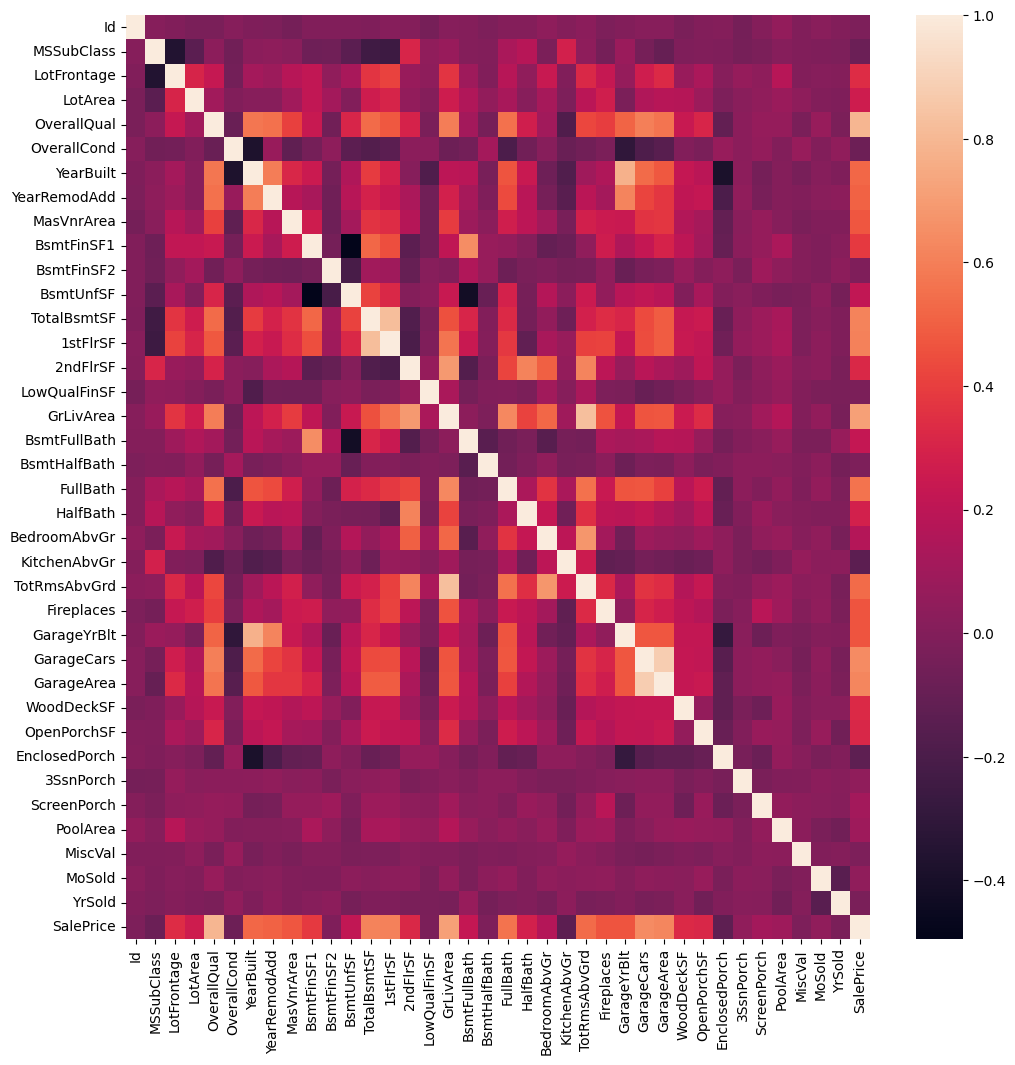

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix)
plt.show()

As we can see some of the vairables are correlated with each other while others are not.
For SalePrice following features are highly coorelated :
**OverallQual , LotFrontage , OverallCond, YearBuilt, YearRemodAdd, TotalBsmtSF , 1stFlrSF , GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, Garafe** so out of 38 numerical variables 15 are significantly correlated with SalePrice.

This analysis on data provides a solid foundation for furhter steps in project such as feature selection , model development, and evaluation.